# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
dataset = pd.read_csv('UberDataset.csv')
dataset.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Checking the null values present in the dataset

In [3]:
dataset.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

# Showing the information about the dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Showing the shape of the dataset

In [5]:
dataset.shape

(1156, 7)

In [6]:
dataset['PURPOSE'].fillna('Not_Available',inplace = True)

C:\Users\ashuj\AppData\Local\Temp\ipykernel_8064\3854372542.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna('Not_Available',inplace = True)


In [7]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not_Available
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# Changing the Data-Type of Start_Date and End_Date (Object to date_time format)

In [8]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors = 'coerce')

In [9]:
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors = 'coerce')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [11]:
from datetime import datetime

dataset['DATE'] = pd.DatetimeIndex(dataset['START_DATE']).date

In [12]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not_Available,2016-01-02
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06


In [13]:
dataset['TIME'] = pd.DatetimeIndex(dataset['START_DATE']).hour

In [14]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not_Available,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


# Creating a category of the day-night column on the basis of Start_Time

In [16]:
dataset['DAY_NIGHT'] = pd.cut(x = dataset['TIME'],bins = [0,12,16,19,24],labels = ['Morning', 'Afternoon', 'Evening', 'Night'])

In [17]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY_NIGHT
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not_Available,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


# Dropping the null value present in the dataset

In [18]:
dataset.dropna(inplace = True)

In [19]:
dataset.shape

(413, 10)

In [20]:
dataset.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
DATE          0
TIME          0
DAY_NIGHT     0
dtype: int64

# Questions related to the project 

# 1. In which category do people book the most Uber rides?

In [21]:
dataset['CATEGORY'].describe()

count          413
unique           2
top       Business
freq           400
Name: CATEGORY, dtype: object

In [23]:
dataset['CATEGORY'].value_counts()

CATEGORY
Business    400
Personal     13
Name: count, dtype: int64

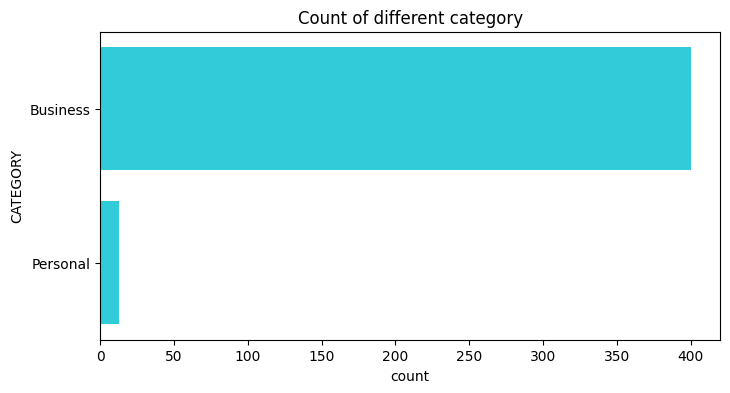

In [24]:
plt.figure(figsize = (8,4))
sns.countplot(dataset['CATEGORY'],color = '#16E2F5')
plt.title('Count of different category')
plt.show()

# 2. For which purpose do people book Uber rides the most?

In [25]:
dataset['PURPOSE'].value_counts()

PURPOSE
Not_Available      159
Meeting             78
Meal/Entertain      62
Customer Visit      46
Errand/Supplies     45
Temporary Site      14
Between Offices      9
Name: count, dtype: int64

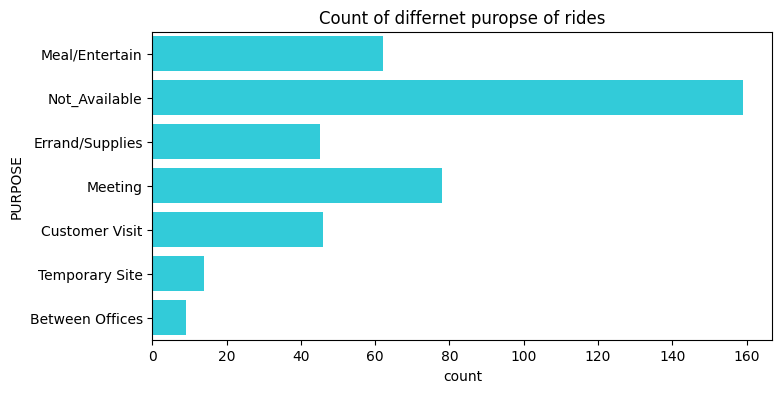

In [26]:
plt.figure(figsize = (8,4))
sns.countplot(dataset['PURPOSE'], color = '#16E2F5')
plt.title('Count of differnet puropse of rides')
plt.show()

# 3. At which time do people book cabs the most from Uber?

In [28]:
dataset['DAY_NIGHT'].value_counts()

DAY_NIGHT
Afternoon    131
Morning      108
Evening      103
Night         71
Name: count, dtype: int64

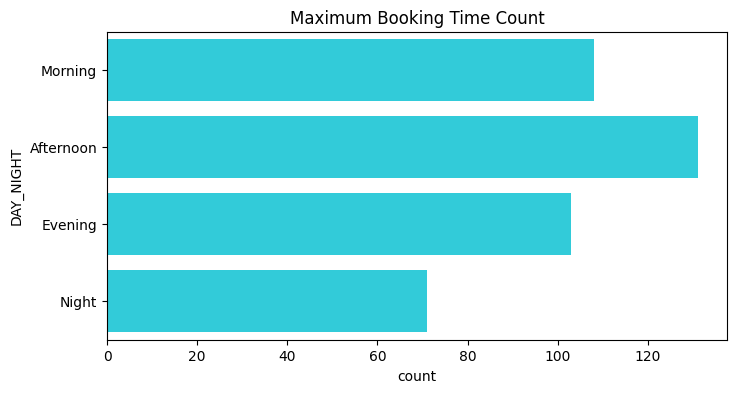

In [29]:
plt.figure(figsize = (8,4))
sns.countplot(dataset['DAY_NIGHT'], color = '#16E2F5')
plt.title("Maximum Booking Time Count")
plt.show()

# Creating a Month column using Start_Date column

In [34]:
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month

month_label = {1.0 : 'January', 2.0 : 'February', 3.0 : 'March', 4.0 : 'April', 
             5.0 : 'May', 6.0 : 'June', 7.0 : 'July', 8.0 : 'August', 
             9.0 : 'September', 10.0 : 'October', 11.0 : 'November', 12.0 : 'December'}

dataset['MONTH'] = dataset.MONTH.map(month_label)

month = dataset.MONTH.value_counts(sort = False)

In [35]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY_NIGHT,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not_Available,2016-01-02,1.0,Morning,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,January


# 4. In which months do people book Uber rides less frequently?

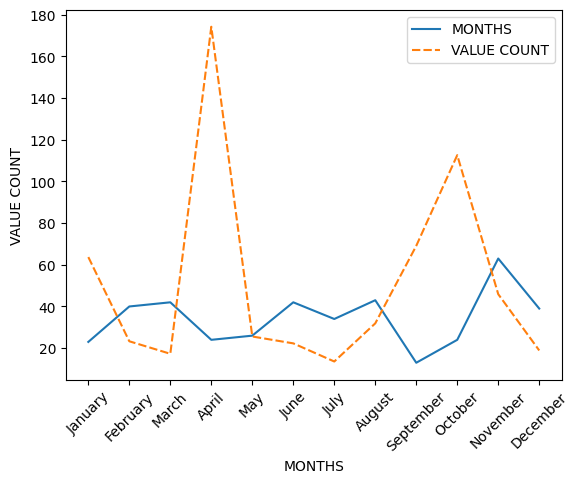

In [40]:
df = pd.DataFrame({
    'MONTHS': month.values,
    'VALUE COUNT' : dataset.groupby('MONTH', sort = False)['MILES'].max()
})

p = sns.lineplot(data = df)
p.set(xlabel = 'MONTHS', ylabel = 'VALUE COUNT')
plt.xticks(rotation = 45)
plt.show()

In [41]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY_NIGHT,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not_Available,2016-01-02,1.0,Morning,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,January


In [42]:
dataset['WEEK_DAY'] = dataset.START_DATE.dt.weekday

day_label = {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6 : 'Sunday'}
dataset['WEEK_DAY'] = dataset['WEEK_DAY'].map(day_label)

In [43]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DATE,TIME,DAY_NIGHT,MONTH,WEEK_DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,January,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not_Available,2016-01-02,1.0,Morning,January,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,January,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,January,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,January,Wednesday


# 5. On which days of the week do people book Uber rides the most? 

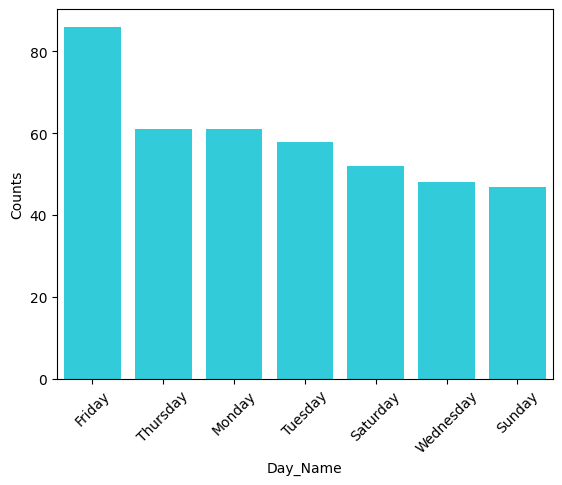

In [47]:
day_label = dataset.WEEK_DAY.value_counts()

sns.barplot(x = day_label.index, y = day_label, color = '#16E2F5')
plt.xlabel('Day_Name')
plt.ylabel('Counts')
plt.xticks(rotation = 45)
plt.show()

# 6. How many miles do people usually book a cab for through Uber?

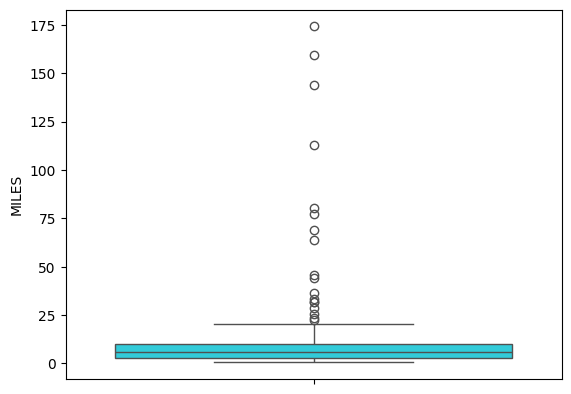

In [50]:
sns.boxplot(dataset['MILES'],color = '#16E2F5')
plt.show()

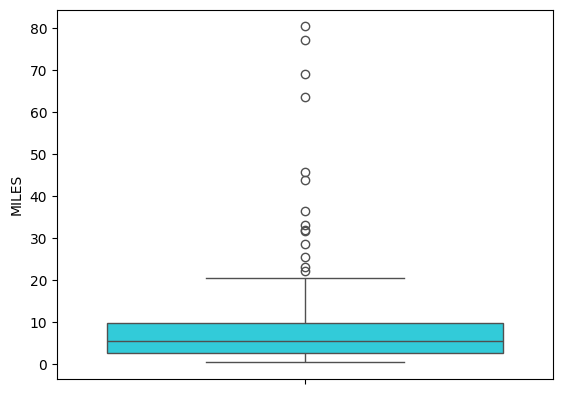

In [52]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'],color = '#16E2F5')
plt.show()

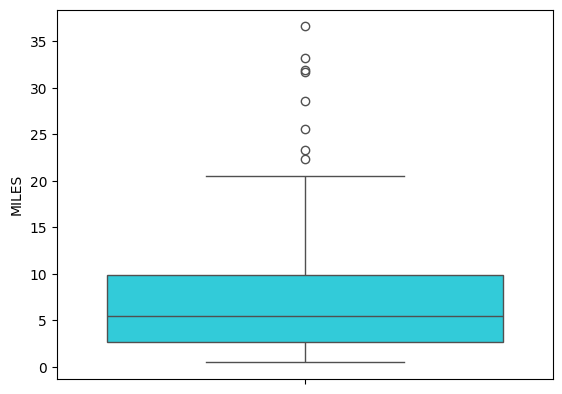

In [56]:
sns.boxplot(dataset[dataset['MILES']<40]['MILES'],color = '#16E2F5')
plt.show()

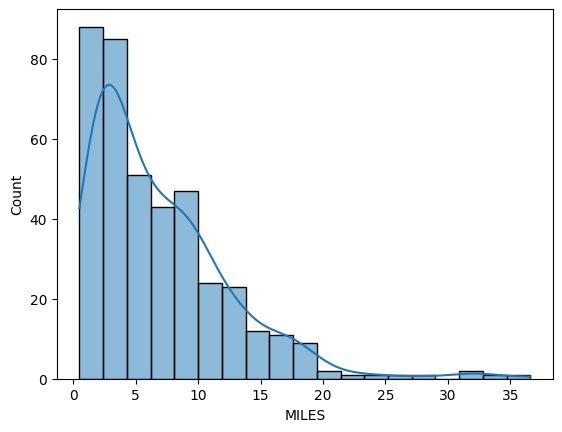

In [65]:
sns.histplot(dataset[dataset['MILES']<40]['MILES'],kde = True)
plt.show()